In [1]:
import cv2
import dlib
import imutils
import argparse
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
from imutils import face_utils

In [2]:
def plt_imshow(title='image', img=None, figsize=(8,5)):
    plt.figure(figsize=figsize)
    
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
            
            for i in range(len(lmg)):
                titles.append(title)
                
        for i in range(len(img)):
            if len(img[i].shape) <=2 :
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2BGR)
            else:
                rgbImg = cv2.cvtColor(imt[2], cv2.COLOR_BGR2RGB)
                
            plt.subplot(1, len(img), i+1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
            
        plt.show()
    else:
        if len(img.shape)<3:
            rgbImg = cv2.cvtColor(img. cv2.COLOR_GRAY2BGR)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = face_recognition.api.pose_predictor_68_point

In [8]:
# 화질이 떨어지면 인식 불가
#image_path = 'data/test.jpeg'
image_path = 'data/test_multi.jpeg'
#image_path = 'data/test_portugal_multi.jpeg'
org_image = cv2.imread(image_path)
image = org_image.copy()
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

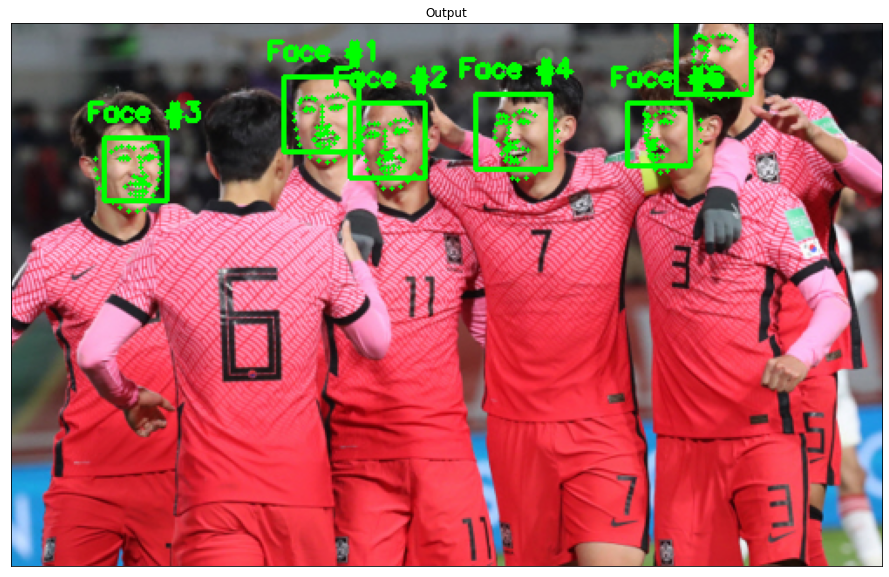

In [9]:
for (i, rect) in enumerate(rects):
    # 얼굴 영역의 얼굴 랜드마크를 결정하고
    # 얼굴 랜드마크 (x,y) 를 numpy array로 변환
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # dlib의 사각형을 OpenCV bounding box로 변환 (x,y,w,h)
    (x,y,w,h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i+1), (x-10, y-10),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # 얼굴 랜드마크에 포인트를 그린다
    for (i, (x,y)) in enumerate(shape):
        cv2.circle(image, (x,y), 1, (0, 255, 0), -1)
        #cv2.putText(image, str(i+1), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)

plt_imshow("Output", image, figsize=(16,10))